In [31]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import cv2
import io
import re
%matplotlib inline
s = io.StringIO()


f = open('New.csv', 'a', newline='')
writer = csv.writer(f)

features = []
# for filename in os.listdir('BoardCells/cell0'):
#         img = cv2.imread(os.path.join('English/Fnt/Sample036/',filename))
#         resized_img = resize(img, (16,16)) 
#         fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), cells_per_block=(2, 2), visualize=True, multichannel=True)
#         features.append(fd)

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts
    
for filename in sorted(os.listdir('BoardCells'), key=numericalSort):
    print(filename)
    img = cv2.imread(os.path.join('BoardCells/',filename))
    resized_img = resize(img, (16,16)) 
    fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), cells_per_block=(2, 2), visualize=True, multichannel=True)
    features.append(fd)

writer.writerows(features)
f.close()


cell0.jpg
cell1.jpg
cell2.jpg
cell3.jpg
cell4.jpg
cell5.jpg
cell6.jpg
cell7.jpg
cell8.jpg
cell9.jpg


C:\Users\HP\AppData\Local\Temp\ipykernel_19516\963375396.py:37: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), cells_per_block=(2, 2), visualize=True, multichannel=True)


cell10.jpg
cell11.jpg
cell12.jpg
cell13.jpg
cell14.jpg
cell15.jpg
cell16.jpg
cell17.jpg
cell18.jpg
cell19.jpg
cell20.jpg
cell21.jpg
cell22.jpg
cell23.jpg
cell24.jpg
cell25.jpg
cell26.jpg
cell27.jpg
cell28.jpg
cell29.jpg
cell30.jpg
cell31.jpg
cell32.jpg
cell33.jpg
cell34.jpg
cell35.jpg
cell36.jpg
cell37.jpg
cell38.jpg
cell39.jpg
cell40.jpg
cell41.jpg
cell42.jpg
cell43.jpg
cell44.jpg
cell45.jpg
cell46.jpg
cell47.jpg
cell48.jpg
cell49.jpg
cell50.jpg
cell51.jpg
cell52.jpg
cell53.jpg
cell54.jpg
cell55.jpg
cell56.jpg
cell57.jpg
cell58.jpg
cell59.jpg
cell60.jpg
cell61.jpg
cell62.jpg
cell63.jpg
cell64.jpg
cell65.jpg
cell66.jpg
cell67.jpg
cell68.jpg
cell69.jpg
cell70.jpg
cell71.jpg
cell72.jpg
cell73.jpg
cell74.jpg
cell75.jpg
cell76.jpg
cell77.jpg
cell78.jpg
cell79.jpg
cell80.jpg
cell81.jpg
cell82.jpg
cell83.jpg
cell84.jpg
cell85.jpg
cell86.jpg
cell87.jpg
cell88.jpg
cell89.jpg
cell90.jpg
cell91.jpg
cell92.jpg
cell93.jpg
cell94.jpg
cell95.jpg
cell96.jpg
cell97.jpg
cell98.jpg
cell99.jpg
cell100.jp

In [12]:
#creating hog features 
# img = cv2.imread('English/Fnt/Sample011/img011-00001.png')
img = cv2.imread('BoardCells/cell0.jpg')
inverted_image = cv2.bitwise_not(img)
resized_img = resize(inverted_image, (16,16)) 
fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19516\247359105.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, pixels_per_cell=(3,3),


In [13]:
fd.shape

(576,)

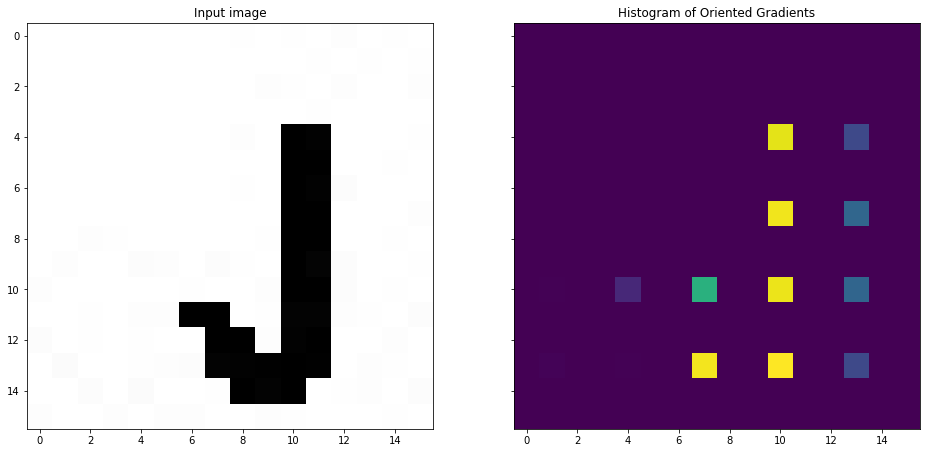

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

# df = pd.DataFrame(fd)
# df.to_csv('Features.csv', index = False, encoding='utf-8') # False: not include index
# print(df)


In [27]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import cv2
import numpy as np
from skimage.transform import resize
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump


data = pd.read_csv('NewFeatures.csv')
X_train = data.iloc[:, :575]
y_train = data.iloc[:,-1]
clf = svm.SVC()
clf = clf.fit(X_train, y_train)
dump(clf, 'svm.joblib')


svmpred = []
knnpred = []
img = cv2.imread('BoardCells/cell47.jpg')
kernel = np.ones((3,3), np.uint8)
dialated = cv2.dilate(inverted_image, kernel, iterations=1)

resized_img = resize(img, (16,16)) 

fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), cells_per_block=(2, 2), visualize=True, multichannel=True)
        
X = fd
nX_test = np.delete(X, -1)
X_test = nX_test.reshape(1,-1)

y_pred = clf.predict(X_test)
svmpred.append(y_pred)

# for filename in os.listdir('BoardCells'):
#         img = cv2.imread(os.path.join('BoardCells/',filename))
        
#         inverted_image = cv2.bitwise_not(img)
#         kernel = np.ones((3,3), np.uint8)
#         dialated = cv2.dilate(inverted_image, kernel, iterations=1)

#         resized_img = resize(dialated, (16,16)) 
#         fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), cells_per_block=(2, 2), visualize=True, multichannel=True)
        
#         X = fd
#         nX_test = np.delete(X, -1)
#         X_test = nX_test.reshape(1,-1)

#         y_pred = clf.predict(X_test)
#         svmpred.append(y_pred)

print('Using SVM: ', svmpred[0])

# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X_train, y_train)
# for filename in os.listdir('BoardCells'):
#         img = cv2.imread(os.path.join('BoardCells/',filename))
        
#         inverted_image = cv2.bitwise_not(img)
#         kernel = np.ones((3,3), np.uint8)
#         dialated = cv2.dilate(inverted_image, kernel, iterations=1)

#         resized_img = resize(dialated, (16,16)) 
#         fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), cells_per_block=(2, 2), visualize=True, multichannel=True)
        
#         X = fd
#         nX_test = np.delete(X, -1)
#         X_test = nX_test.reshape(1,-1)
#         knnpred.append(neigh.predict(X_test))

# print('Using KNN: ', knnpred)



Using SVM:  ['I']


C:\Users\HP\AppData\Local\Temp\ipykernel_19516\3820017747.py:32: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, pixels_per_cell=(3,3), cells_per_block=(2, 2), visualize=True, multichannel=True)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts
    
for filename in sorted(os.listdir('BoardCells'), key=numericalSort):
    print(filename)

cell0.jpg
cell1.jpg
cell2.jpg
cell3.jpg
cell4.jpg
cell5.jpg
cell6.jpg
cell7.jpg
cell8.jpg
cell9.jpg
cell10.jpg
cell11.jpg
cell12.jpg
cell13.jpg
cell14.jpg
cell15.jpg
cell16.jpg
cell17.jpg
cell18.jpg
cell19.jpg
cell20.jpg
cell21.jpg
cell22.jpg
cell23.jpg
cell24.jpg
cell25.jpg
cell26.jpg
cell27.jpg
cell28.jpg
cell29.jpg
cell30.jpg
cell31.jpg
cell32.jpg
cell33.jpg
cell34.jpg
cell35.jpg
cell36.jpg
cell37.jpg
cell38.jpg
cell39.jpg
cell40.jpg
cell41.jpg
cell42.jpg
cell43.jpg
cell44.jpg
cell45.jpg
cell46.jpg
cell47.jpg
cell48.jpg
cell49.jpg
cell50.jpg
cell51.jpg
cell52.jpg
cell53.jpg
cell54.jpg
cell55.jpg
cell56.jpg
cell57.jpg
cell58.jpg
cell59.jpg
cell60.jpg
cell61.jpg
cell62.jpg
cell63.jpg
cell64.jpg
cell65.jpg
cell66.jpg
cell67.jpg
cell68.jpg
cell69.jpg
cell70.jpg
cell71.jpg
cell72.jpg
cell73.jpg
cell74.jpg
cell75.jpg
cell76.jpg
cell77.jpg
cell78.jpg
cell79.jpg
cell80.jpg
cell81.jpg
cell82.jpg
cell83.jpg
cell84.jpg
cell85.jpg
cell86.jpg
cell87.jpg
cell88.jpg
cell89.jpg
cell90.jpg
cell91.jp

Number of mislabeled points out of a total 45 points : 37
(225, 575) 225
(180, 575) (180,) (45, 575)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


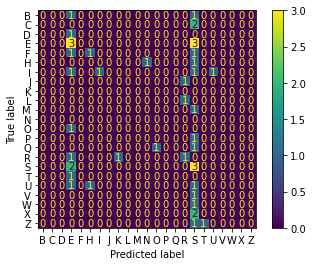

Number of mislabeled points out of a total 45 points : 27
(225, 575) 225
(180, 575) (180,) (45, 575)
Number of mislabeled points out of a total 45 points : 18
(225, 575) 225
(180, 575) (180,) (45, 575)
Number of mislabeled points out of a total 45 points : 40
(225, 575) 225
(180, 575) (180,) (45, 575)
Number of mislabeled points out of a total 45 points : 21
(225, 575) 225
(180, 575) (180,) (45, 575)


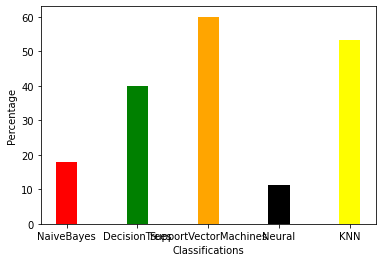

In [5]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

result=[]

data = pd.read_csv('New.csv')
X = data.iloc[:, :575]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
# for training and and testing of a function
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print(X.shape,len(y))
print(X_train.shape,y_train.shape,X_test.shape)

class1 = (y_test != y_pred).sum()
class1 = ((len(y_test) - class1)/len(y_test)) * 100
result.append(class1)

plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(X.shape,len(y))
class1 = (y_test != y_pred).sum()
class1 = ((len(y_test) - class1)/len(y_test)) * 100
result.append(class1)
print(X_train.shape,y_train.shape,X_test.shape)

clf = svm.SVC()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(X.shape,len(y))
class1 = (y_test != y_pred).sum()
class1 = ((len(y_test) - class1)/len(y_test)) * 100
result.append(class1)
print(X_train.shape,y_train.shape,X_test.shape)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(X.shape,len(y))
class1 = (y_test != y_pred).sum()
class1 = ((len(y_test) - class1)/len(y_test)) * 100
result.append(class1)
print(X_train.shape,y_train.shape,X_test.shape)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(X.shape,len(y))
class1 = (y_test != y_pred).sum()
class1 = ((len(y_test) - class1)/len(y_test)) * 100
result.append(class1)
print(X_train.shape,y_train.shape,X_test.shape)


x = ["NaiveBayes", "DecisionTrees", "SupportVectorMachines", "Neural", "KNN"]
h = result
c = ["red", "green", "orange", "black", "yellow"]
plt.bar(x,h,width=0.3, color=c)
plt.xlabel("Classifications")
plt.ylabel("Percentage")
plt.show()